In [12]:
import os
from PIL import Image

In [14]:
os.remove('dataset/.DS_Store')

### Image Quality Check

In [ ]:
for image_direc in os.listdir('dataset/'):
    for filename in os.listdir('dataset/'+image_direc):
        img_file = 'dataset/'+image_direc+ "/" + filename
        try :
            Image.open(img_file)
        except :
            print('EXCEPT '+img_file)
            os.remove('dataset/'+image_direc+ "/" + filename)

### Data Augmentation

In [20]:
import os
from PIL import Image
from torchvision import models, transforms

In [21]:
def standardize_images(src_dir, dest_dir):
    preprocess = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224)])


    for i in os.listdir(src_dir):
        print(i)
        img = preprocess(Image.open(src_dir+i))
        img = img.convert("RGB")
        img.save(dest_dir+i, "JPEG")

In [24]:
for i in os.listdir('dataset/'):
    os.makedirs('PlasticNet/'+i)

In [ ]:
for i in os.listdir('dataset/'):
    standardize_images('dataset/'+i+'/','PlasticNet/'+i+'/')

In [31]:
from glob import glob
import shutil

In [27]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [34]:
os.removedirs('master_dataset/.ipynb_checkpoints')

In [36]:
os.listdir('PlasticNet/')

['disposable_coffee_cup',
 'pipes_ducts',
 'margarine_tubs',
 'rope',
 'shoes',
 'milk_jugs',
 'medicine_jars',
 'tupperware',
 'large_water_bottles',
 'baby_bottles',
 'plastic_cd',
 'yogurt_container',
 'exterior_lighting_fixtures',
 'plastic_food_box',
 'motor_oil_containers',
 'bottle_caps',
 'combs',
 'jelly_jars',
 'disposable_cup_plate',
 'take_out_containers',
 'tote_bags',
 'window_frame',
 'cling_films',
 'plastic_cutlery',
 'trash_bags',
 'toys',
 'squeeze_bottles',
 'plastic_diapers',
 'packing_foam',
 'pet_bottle',
 'eyeglasses',
 'medical_storage_containers',
 'detergent_bleach',
 'flexible_lids',
 'juice_containers',
 'shampoo_soap_bottle',
 '.ipynb_checkpoints',
 'stadium_cups',
 'grocery_bags',
 'tile',
 'prescription_bottle',
 'sandwidch_bags',
 'bean_bags']

In [38]:
for i in os.listdir('PlasticNet/'):
    os.makedirs('master_dataset/valid/'+i)

### Data Shuffling

In [39]:
for plastic_net_files in os.listdir('PlasticNet/'):
    image_files = glob('PlasticNet/'+plastic_net_files+'/*.jpg')
    shuf = np.random.permutation(image_files)
    for i in range(int(len(shuf)*0.7)): 
        shutil.copyfile(shuf[i], 'master_dataset/train/'+plastic_net_files+'/'+
                 shuf[i].replace('PlasticNet/'+plastic_net_files, ''))
    for i in range(int(len(shuf)*0.7)+1,int(len(shuf))): 
        shutil.copyfile(shuf[i], 'master_dataset/valid/'+plastic_net_files+'/'+
                 shuf[i].replace('PlasticNet/'+plastic_net_files, ''))

### Model Training

In [1]:
from fastai.vision import *
from fastai.metrics import error_rate
from PIL import Image

In [2]:
bs = 64

In [3]:
tfms = get_transforms()

In [4]:
data = ImageDataBunch.from_folder('master_dataset/', 
                                  ds_tfms=tfms, size=224, bs = bs).normalize(imagenet_stats)

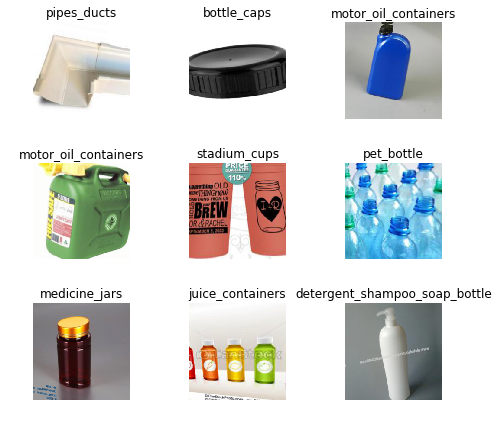

In [5]:
data.show_batch(rows=3, figsize=(7,6))

In [6]:
print(data.classes)
len(data.classes),data.c

['baby_bottles', 'bean_bags', 'bottle_caps', 'cling_films', 'combs', 'detergent_shampoo_soap_bottle', 'disposable_coffee_cup', 'disposable_cup_plate', 'exterior_lighting_fixtures', 'eyeglasses', 'flexible_lids', 'grocery_bags', 'jelly_jars', 'juice_containers', 'large_water_bottles', 'margarine_tubs', 'medical_storage_containers', 'medicine_jars', 'milk_jugs', 'motor_oil_containers', 'packing_foam', 'pet_bottle', 'pipes_ducts', 'plastic_cd', 'plastic_cutlery', 'plastic_diapers', 'plastic_food_box', 'prescription_bottle', 'rope', 'sandwidch_bags', 'shoes', 'squeeze_bottles', 'stadium_cups', 'take_out_containers', 'tile', 'tote_bags', 'toys', 'trash_bags', 'tupperware', 'window_frame', 'yogurt_container']


(41, 41)

In [5]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [8]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


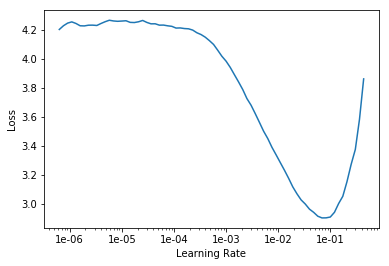

In [9]:
learn.recorder.plot()

In [6]:
learn.fit_one_cycle(10,max_lr=slice(7e-3))

epoch,train_loss,valid_loss,error_rate,time
0,1.995564,0.911749,0.254846,01:27
1,1.215204,0.778199,0.244584,01:16
2,0.934370,0.737539,0.230901,01:16
3,0.763754,0.674925,0.195553,01:15
4,0.614196,0.632403,0.187001,01:16
5,0.496467,0.675292,0.196693,01:16
6,0.387976,0.655288,0.181870,01:16
7,0.311057,0.610573,0.181870,01:16
8,0.239880,0.596407,0.179590,01:16
9,0.206048,0.590164,0.172748,01:16


In [7]:
learn.save('plastic-net-1')

In [8]:
learn.unfreeze()

In [9]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


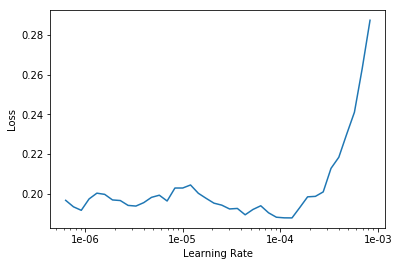

In [10]:
learn.recorder.plot()

In [11]:
learn.fit_one_cycle(10, max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.193947,0.590383,0.173888,01:37
1,0.188139,0.602298,0.171608,01:37
2,0.175330,0.591127,0.169897,01:37
3,0.167542,0.611015,0.173318,01:37
4,0.142691,0.600457,0.167047,01:37
5,0.121111,0.592816,0.163056,01:37
6,0.095959,0.596412,0.159065,01:38
7,0.094757,0.589163,0.161345,01:37
8,0.078560,0.590942,0.157355,01:37
9,0.068827,0.587435,0.153934,01:37


In [12]:
learn.save('plastic-net-2')

In [13]:
interp = ClassificationInterpretation.from_learner(learn)

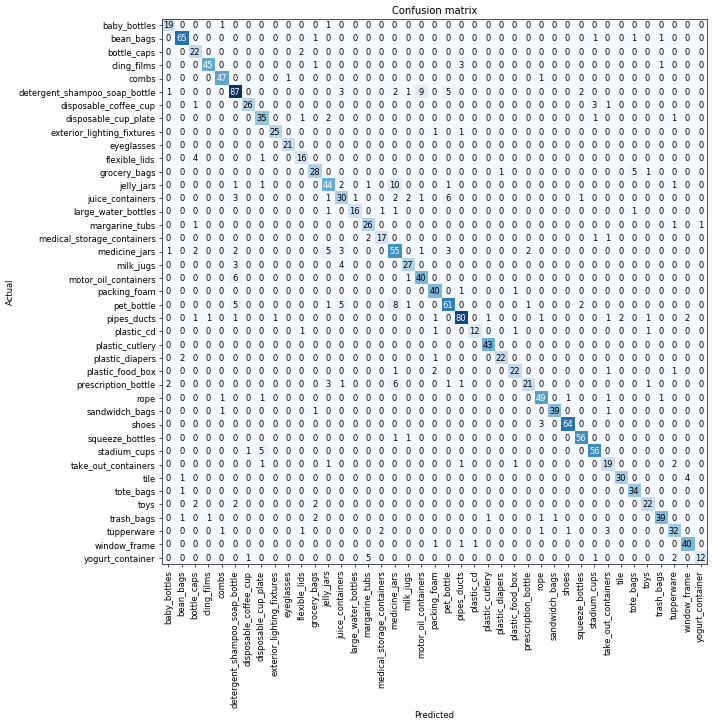

In [14]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [15]:
learn.export()